## <b>Weather forecast project 

# <b>06 - ADVANCED MODELING TECHNIQUES : MODELING REGIONALLY

# Rain in Australia
---
#### Dataset source:
Le dataset issu de l'étape de feature engineering est utilisé dans ce notebook :

- data_features.csv contenant les données nettoyées et préparées sur la base du dataset initiale

#### Context:
brève description du notebook :

> <div class= "alert alert-block alert-info"> <b>
Dans ce notebook, nous proposons de segmenter les données météorologiques par zones plus homogènes climatiques ou locales pour améliorer les performances du modèle de prédiction de la pluie en Australie </b>. Nous chargeons deux ensembles de données préparés, l'un basé sur la typologie climatique et l'autre sur la géographie locale, et comparons leur taille en utilisant des histogrammes. Ensuite, nous appliquons un modèle de classification Random Forest pour prédire s'il va pleuvoir le lendemain en utilisant les données météorologiques et géographiques préparées et segmentées précédemment. Nous évaluons le modèle en utilisant la métrique f1_weighted pour mesurer sa performance globale. 

> <div class= "alert alert-block alert-info"> <b>
Nous vérifions le surapprentissage du modèle </b> et utilisons également la technique de validation croisée pour évaluer la performance du modèle de manière plus robuste en effectuant plusieurs séparations entre l'ensemble d'entraînement et l'ensemble de test. Nous affichons les résultats de la validation croisée pour chaque pli afin de visualiser les performances du modèle sur différents ensembles de données.
Ces méthodes permettent de vérifier si le modèle est surajusté.
</div>




# [Table of contents](#0)<a name=0></a>

1. [Préparation des données en modèles régionales](#1)
    
    1.1 [Découpage du dataset selon les principaux climats australiens](#1.1)
    
     > * Climat chaud et humide 
     > * Climat tempéré et froid 
     > * Climat méditerranéen
     > * Climat sec

    1.2 [Découpage du dataset en fonction d'une zone locale : Norfolk Island](#1.3)

    1.3 [Comparaison de la taille des datasets climatiques et local](#1.4)     
    
2. [Application d'un modèle de classification : Random Forest Classifier](#2)

3. [Optimisation bayésienne des performances des modèles](#2)

4. [Conclusion](#3)

#### Packages nécessaires au notebook :

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import time
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,f_classif,chi2
from sklearn.metrics import recall_score, f1_score

from skopt import BayesSearchCV
from skopt.space import Real, Integer

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, f1_score

In [11]:
df = pd.read_csv("/content/drive/Othercomputers/Dell inspiron/datascientest/projet/australia_weather_forecasts/data/data_features.csv", index_col=0)

In [12]:
df.climat.value_counts()

0    30281
2    19185
3    15188
1     8053
Name: climat, dtype: int64

In [13]:
# Issu du notebook dataprocessing
    # 0 : Chaud humide 
    # 2 : Tempéré froid 
    # 3 : Méditerranéen 
    # 1 : Sec 

# 1.Préparation des données en modèles régionales <a name=1></a>
[return to the plan](#0)  

L'objectif de cette préparation est de découper les données en fonction des climats et une zone localisée
* dataset climatique
* dataset local

## 1.1.Découpage du dataset selon les principaux climats australiens <a name=1.1></a>
[return to the plan](#0)  

### 1.1.1 Climat chaud et humide <a name=1.1.1></a> 

In [14]:
df_chaud_humide = df[df.climat == 0]
df_chaud_humide.head()

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,windspeed3pm,temp_amplitude,cloud3pm,rainfall,climat,...,cloud9am,winddir9am_sin,latitude,month,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
0,10.90,44.00,22.00,1007.10,2008,24.00,9.50,7.00,0.60,0,...,8.00,0.00,-36.07,12,0,0,7.60,20.00,-1.00,0
1,12.90,44.00,25.00,1007.80,2008,22.00,17.70,1.00,0.00,0,...,1.00,0.92,-36.07,12,0,0,12.00,4.00,-0.92,0
2,8.00,46.00,30.00,1008.70,2008,26.00,12.80,2.00,0.00,0,...,7.00,0.00,-36.07,12,0,0,8.00,19.00,-0.92,0
3,2.20,24.00,16.00,1012.80,2008,9.00,18.80,6.00,0.00,0,...,8.00,-0.71,-36.07,12,0,0,10.00,11.00,0.71,0
4,6.70,41.00,33.00,1006.00,2008,20.00,14.80,8.00,1.00,0,...,7.00,0.38,-36.07,12,0,0,4.80,7.00,-1.00,0


### 1.1.2 Climat tempéré et froid <a name=1.1.2></a>

In [15]:
df_tempere_froid = df[df.climat == 2]
df_tempere_froid.head()

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,windspeed3pm,temp_amplitude,cloud3pm,rainfall,climat,...,cloud9am,winddir9am_sin,latitude,month,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
19451,10.80,39.00,65.00,1018.90,2008,22.00,5.80,7.00,0.40,2,...,8.00,0.00,-34.41,12,1,0,11.00,20.00,0.71,0
19452,8.10,41.00,75.00,1009.20,2008,19.00,9.70,5.00,0.00,2,...,8.00,0.92,-34.41,12,1,0,6.60,22.00,0.92,0
19453,9.40,44.00,81.00,1004.40,2008,22.00,13.90,4.00,0.20,2,...,6.00,-0.71,-34.41,12,1,0,6.40,6.00,0.38,0
19454,12.30,50.00,80.00,1008.90,2008,28.00,5.70,7.00,0.60,2,...,8.00,0.38,-34.41,12,1,0,12.40,28.00,0.38,1
19455,12.90,56.00,54.00,1007.60,2008,28.00,5.30,3.00,0.60,2,...,3.00,-0.92,-34.41,12,1,0,6.60,31.00,-0.38,0


### 1.1.3 Climat méditerranéen <a name=1.1.3></a> 

In [16]:
df_mediterraneen = df[df.climat == 3]
df_mediterraneen.head()

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,windspeed3pm,temp_amplitude,cloud3pm,rainfall,climat,...,cloud9am,winddir9am_sin,latitude,month,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
36310,6.50,59.00,99.00,1010.50,2009,28.00,4.10,6.00,0.00,3,...,7.00,-0.71,-38.33,1,1,0,4.80,28.00,-0.71,1
36311,11.70,39.00,61.00,1021.30,2009,17.00,6.60,2.00,1.60,3,...,6.00,-0.71,-38.33,1,1,1,4.80,20.00,-0.38,0
36312,11.90,30.00,52.00,1018.30,2009,15.00,16.40,3.00,0.20,3,...,6.00,0.71,-38.33,1,1,0,4.60,9.00,-0.00,0
36313,13.80,28.00,63.00,1015.20,2009,17.00,15.30,1.00,0.00,3,...,1.00,0.00,-38.33,1,1,0,4.80,11.00,-0.00,0
36314,13.60,46.00,68.00,1013.40,2009,31.00,14.40,3.00,0.00,3,...,4.00,0.00,-38.33,1,1,0,5.60,20.00,-1.00,0


### 1.1.4 Climat sec <a name=1.1.4></a>

In [17]:
df_sec = df[df.climat == 1]
df_sec.head()

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,windspeed3pm,temp_amplitude,cloud3pm,rainfall,climat,...,cloud9am,winddir9am_sin,latitude,month,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
3787,10.60,46.00,22.00,1009.20,2009,15.00,18.20,6.00,0.00,1,...,1.00,0.92,-31.07,1,2,0,10.80,30.00,0.38,0
3788,12.20,31.00,22.00,1009.10,2009,6.00,16.50,5.00,0.00,1,...,1.00,0.38,-31.07,1,2,0,11.40,6.00,-0.92,0
3789,0.00,43.00,19.00,1007.40,2009,20.00,9.00,8.00,0.00,1,...,8.00,1.00,-31.07,1,2,0,13.00,7.00,0.00,0
3790,12.60,41.00,15.00,1009.90,2009,19.00,10.70,1.00,0.00,1,...,3.00,-1.00,-31.07,1,2,0,9.80,17.00,-0.38,0
3791,12.30,48.00,28.00,1004.00,2009,9.00,16.50,5.00,0.00,1,...,1.00,0.38,-31.07,1,2,0,12.00,30.00,0.92,0


## 1.2 Découpage du dataset en fonction d'une zone locale : Norfolk Island <a name=1.1></a>
[return to the plan](#0) 

In [18]:
df_local = df[df.geography == 3]
df_local.head()

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,windspeed3pm,temp_amplitude,cloud3pm,rainfall,climat,...,cloud9am,winddir9am_sin,latitude,month,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
10082,12.40,31.00,71.00,1013.60,2009,19.00,5.40,1.00,0.00,0,...,3.00,0.92,-28.95,1,3,0,6.00,13.00,-0.38,0
10083,10.30,31.00,77.00,1015.50,2009,6.00,5.80,5.00,0.20,0,...,2.00,0.92,-28.95,1,3,0,8.00,15.00,0.00,0
10084,2.00,35.00,90.00,1014.30,2009,19.00,4.00,7.00,0.00,0,...,7.00,0.38,-28.95,1,3,0,3.20,6.00,1.00,1
10085,0.00,41.00,95.00,1015.30,2009,22.00,0.60,8.00,1.20,0,...,8.00,-0.38,-28.95,1,3,1,2.80,20.00,0.92,1
10086,8.70,48.00,79.00,1012.70,2009,24.00,4.00,3.00,0.00,0,...,5.00,-0.38,-28.95,1,3,0,3.00,30.00,1.00,0


In [19]:
# Stockage des dataframes dans une liste avec leur nom
df_list = [("df_chaud_humide", df_chaud_humide),
           ("df_tempere_froid", df_tempere_froid),
           ("df_mediterraneen", df_mediterraneen),
           ("df_sec", df_sec),
           ("df_local", df_local)]

# Création d'un dataframe vide pour stocker les tailles de chaque dataframe
df_shape = pd.DataFrame(columns=["Dataframe", "Rows", "Columns"])

# Remplissage du dataframe avec les tailles de chaque dataframe
for df_name, df in df_list:
    df_shape = df_shape.append({"Dataframe": df_name, "Rows": df.shape[0], "Columns": df.shape[1]}, ignore_index=True)

df_shape[["Dataframe","Rows"]]

,Dataframe,Rows
0,df_chaud_humide,30281
1,df_tempere_froid,19185
2,df_mediterraneen,15188
3,df_sec,8053
4,df_local,1892


## 1.3 Comparaison de la taille des datasets climatiques et local <a name=1.1></a>
[return to the plan](#0) 

<Figure size 3000x15500 with 0 Axes>

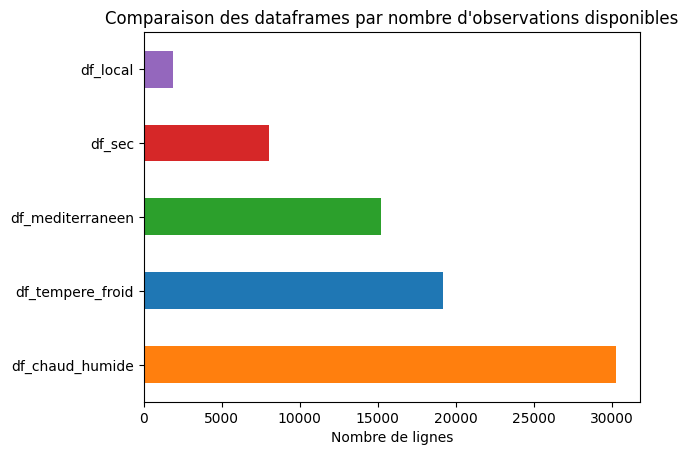

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df_names = ["df_chaud_humide", "df_tempere_froid", "df_mediterraneen", "df_sec", "df_local"]

colors_dict = {"df_chaud_humide": "#ff7f0e", "df_tempere_froid": "#1f77b4", "df_mediterraneen": "#2ca02c",
               "df_sec": "#d62728", "df_local": "#9467bd"}

# Création d'une liste de tuples contenant les noms des dataframes et les dataframes eux-mêmes
df_list = [(name, globals()[name]) for name in df_names]

# Création d'un dataframe contenant les tailles de chaque dataframe
df_shape = pd.DataFrame({"Dataframe": [name for name, df in df_list],
                         "Rows": [df.shape[0] for name, df in df_list],
                         "Columns": [df.shape[1] for name, df in df_list]})

# Couleurs pour chaque histogramme
colors = [colors_dict[name] for name in df_names]

# Création d'un graphe de comparaison des dataframes en termes de nombre de lignes
plt.figure(figsize=(30, 155))
df_shape.plot(kind="barh", x="Dataframe", y="Rows", color=colors, legend=False)
plt.title("Comparaison des dataframes par nombre d'observations disponibles")
plt.xlabel("Nombre de lignes")
plt.ylabel("")
plt.show();

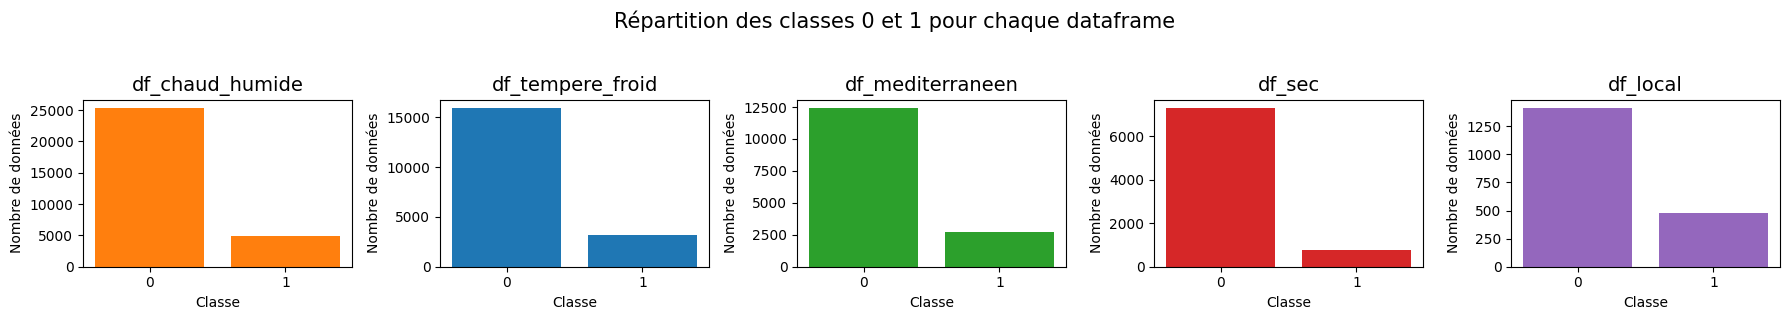

In [21]:
fig, axs = plt.subplots(1, len(df_names), figsize=(18, 3))

fig.suptitle("Répartition des classes 0 et 1 pour chaque dataframe", fontsize=15, y=1.05)

for i, (name, df) in enumerate(df_list):
    class_counts = df["raintomorrow"].value_counts()
    axs[i].bar(class_counts.index, class_counts.values, color=colors_dict[name])
    axs[i].set_title(f"{name}", fontsize=14)
    axs[i].set_xlabel("Classe")
    axs[i].set_ylabel("Nombre de données")
    axs[i].set_xticks([0,1])

plt.tight_layout()
plt.show()

# 2.Application d'un modèle de classification Random Forest Classifier<a name=1></a>
[return to the plan](#0)  

In [22]:
rfc =RandomForestClassifier()

In [23]:
from sklearn.metrics import classification_report, recall_score, f1_score

def evaluate(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print(f"Weighted F1 score: {f1_weighted:.2f}")
    
    df1 = pd.DataFrame({
        "type_modele": [name],
        "nom": [model],
        'accuracy':[accuracy],
        'recall':[recall],
        'f1_weighted':[f1_weighted]
    })
    
    return df1

In [50]:
df_names = ["df_chaud_humide", "df_tempere_froid", "df_mediterraneen", "df_sec", "df_local"]
df_list = [df_chaud_humide, df_tempere_froid, df_mediterraneen, df_sec, df_local]

results = []
for name, df in zip(df_names, df_list):
    X = df.drop("raintomorrow", axis=1)
    y = df["raintomorrow"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    clf = RandomForestClassifier()
    print(name)
    result = evaluate(name, clf, X_train, y_train, X_test, y_test)
    results.append(result)
    print("\n")
    print("\n")

results_df = pd.concat(results)
results_df

df_chaud_humide
Model: df_chaud_humide
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5087
           1       0.75      0.35      0.48       970

    accuracy                           0.88      6057
   macro avg       0.82      0.66      0.70      6057
weighted avg       0.87      0.88      0.86      6057

Accuracy: 0.88
Recall: 0.35
F1 score: 0.48
Weighted F1 score: 0.86




df_tempere_froid
Model: df_tempere_froid
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3204
           1       0.73      0.36      0.48       633

    accuracy                           0.87      3837
   macro avg       0.81      0.67      0.71      3837
weighted avg       0.86      0.87      0.85      3837

Accuracy: 0.87
Recall: 0.36
F1 score: 0.48
Weighted F1 score: 0.85




df_mediterraneen
Model: df_mediterraneen
              precision    recall  f1-score   support

           0       0.90     

,type_modele,nom,accuracy,recall,f1_weighted
0,df_chaud_humide,"(DecisionTreeClassifier(max_features='sqrt', r...",0.88,0.35,0.86
0,df_tempere_froid,"(DecisionTreeClassifier(max_features='sqrt', r...",0.87,0.36,0.85
0,df_mediterraneen,"(DecisionTreeClassifier(max_features='sqrt', r...",0.89,0.52,0.89
0,df_sec,"(DecisionTreeClassifier(max_features='sqrt', r...",0.94,0.42,0.93
0,df_local,"(DecisionTreeClassifier(max_features='sqrt', r...",0.79,0.41,0.78


<b> Analyse : 
* Le modèle df_chaud_humide présente une précision de 0.89 et un rappel de 0.98 pour la classe 0, tandis que la précision pour la classe 1 est de 0.76 et le rappel est de 0.36. Le F1-score pour la classe 1 est de 0.48 et le F1-score pondéré est de 0.86. Le modèle a une précision globale de 0.88.

* Le modèle df_tempere_froid présente une précision de 0.89 et un rappel de 0.97 pour la classe 0, tandis que la précision pour la classe 1 est de 0.73 et le rappel est de 0.37. Le F1-score pour la classe 1 est de 0.49 et le F1-score pondéré est de 0.86. Le modèle a une précision globale de 0.87.

* Le modèle df_mediterraneen présente une précision de 0.90 et un rappel de 0.97 pour la classe 0, tandis que la précision pour la classe 1 est de 0.79 et le rappel est de 0.52. Le F1-score pour la classe 1 est de 0.63 et le F1-score pondéré est de 0.88. Le modèle a une précision globale de 0.89.

* Le modèle df_sec présente une précision de 0.95 et un rappel de 0.99 pour la classe 0, tandis que la précision pour la classe 1 est de 0.86 et le rappel est de 0.45. Le F1-score pour la classe 1 est de 0.59 et le F1-score pondéré est de 0.93. Le modèle a une précision globale de 0.94.

* Le modèle df_local présente une précision de 0.81 et un rappel de 0.92 pour la classe 0, tandis que la précision pour la classe 1 est de 0.65 et le rappel est de 0.40. Le F1-score pour la classe 1 est de 0.49 et le F1-score pondéré est de 0.77. Le modèle a une précision globale de 0.78.

<b> En résumé, les modèles ont des performances variables en fonction de l'ensemble de données et de la classe prédite. Le modèle df_chaud_humide et le modèle df_mediterraneen semblent avoir des performances supérieures par rapport aux autres modèles en termes de précision, rappel et F1-score pondéré.

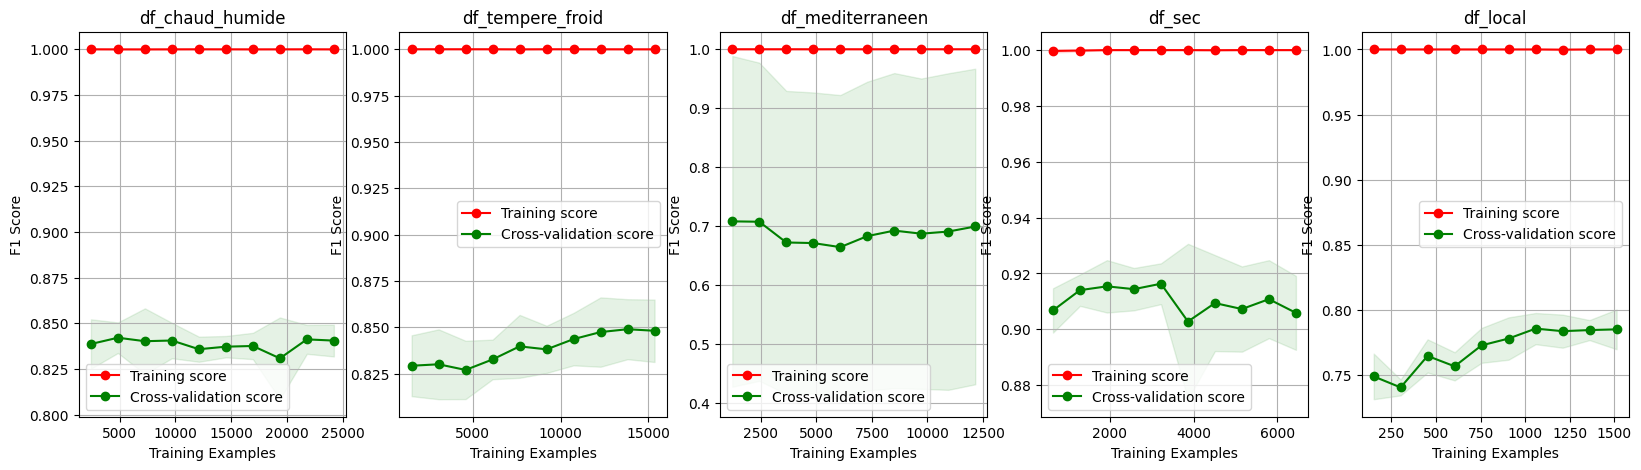

In [25]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

df_names = ["df_chaud_humide", "df_tempere_froid", "df_mediterraneen", "df_sec", "df_local"]
fig, axs = plt.subplots(ncols=len(df_names), figsize=(20,5))

for i, (name, df) in enumerate(zip(df_names, df_list)):
    X = df.drop("raintomorrow", axis=1)
    y = df["raintomorrow"]

    train_sizes, train_scores, test_scores = learning_curve(
        RandomForestClassifier(),
        X,
        y,
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1_weighted',
        n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axs[i].set_title(name)
    axs[i].set_xlabel("Training Examples")
    axs[i].set_ylabel("F1 Score")
    axs[i].grid()
    
    axs[i].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    axs[i].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    axs[i].plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    axs[i].plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    axs[i].legend(loc="best")

plt.show()

<b> Analyse : 
* Pour chaque ensemble de données, le code génère un graphique de courbes d'apprentissage avec le nombre d'exemples d'entraînement sur l'axe des x et le score F1 Weighted sur l'axe des y. Le graphique contient deux courbes, une pour le score d'entraînement et une pour le score de validation croisée. Les zones ombrées autour de chaque courbe représentent l'écart type des scores.

* Le but des courbes d'apprentissage est d'évaluer les performances du classificateur sur l'ensemble d'entraînement et l'ensemble de validation à mesure que le nombre d'exemples d'entraînement augmente. Si le score d'entraînement est beaucoup plus élevé que le score de validation, cela indique un surapprentissage, ce qui signifie que le modèle est trop complexe et s'ajuste trop étroitement aux données d'entraînement, ce qui entraîne une mauvaise généralisation aux nouvelles données.

* Le paramètre `train_sizes` spécifie les tailles des sous-ensembles d'entraînement, qui sont uniformément réparties entre 10% et 100% de la taille totale de l'ensemble d'entraînement. Le paramètre `cv` spécifie le nombre de plis dans la validation croisée. Le paramètre `n_jobs` spécifie le nombre de cœurs de CPU à utiliser pour le calcul parallèle.

* Les courbes d'apprentissage montrent que les performances du classificateur de forêt aléatoire s'améliorent à mesure que le nombre d'exemples d'entraînement augmente (sauf pour le `modèle temps sec`). Les courbes des scores d'entraînement et de validation croisée sont proches les unes des autres, ce qui indique qu'il n'y a pas de surapprentissage significatif. Cependant, la largeur de la zone ombrée autour des courbes varie entre les ensembles de données, avec `df_mediterraneen` ayant la zone la plus large, ce qui indique une plus grande variabilité dans les scores de performances.

# 3. Optimisation Bayesienne des performances des modèles <a name=3></a>
[return to the plan](#0)  

## 3.1 Recherche des meilleurs paramètres par optimisation bayésienne

In [26]:
df_names = ["df_chaud_humide", "df_tempere_froid", "df_mediterraneen", "df_sec", "df_local"]
df_list = [df_chaud_humide, df_tempere_froid, df_mediterraneen, df_sec, df_local]

results = []
for name, df in zip(df_names, df_list):
    X = df.drop("raintomorrow", axis=1)
    y = df["raintomorrow"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Définition de l'espace de recherche pour l'optimisation bayésienne
    space = {
        'n_estimators': Integer(100, 1000),
        'max_depth': Integer(3, 15),
        'min_samples_split': Integer(2, 10),
        'min_samples_leaf': Integer(1, 5),
        'max_features': Real(0.1, 1.0, prior='uniform')
    }

    # Définition de l'optimiseur bayésien avec 20 itérations
    bayessearch_cv = BayesSearchCV(RandomForestClassifier(), space, n_iter=20, scoring='accuracy', n_jobs=-1, cv=5)

    # Lancement de l'optimisation
    bayessearch_cv.fit(X_train, y_train)

    # Récupération des meilleurs hyperparamètres trouvés
    best_params = bayessearch_cv.best_params_
    results.append([name, best_params])

# Création d'un dataframe avec les résultats
results_df = pd.DataFrame(results, columns=["dataframe", "best_params"])
results_df

,dataframe,best_params
0,df_chaud_humide,"{'max_depth': 14, 'max_features': 0.5473951762..."
1,df_tempere_froid,"{'max_depth': 15, 'max_features': 0.4928948361..."
2,df_mediterraneen,"{'max_depth': 15, 'max_features': 0.6192743052..."
3,df_sec,"{'max_depth': 10, 'max_features': 0.5794104156..."
4,df_local,"{'max_depth': 12, 'max_features': 0.2282471810..."


In [47]:
results_df

,dataframe,best_params
0,df_chaud_humide,"{'max_depth': 14, 'max_features': 0.5473951762..."
1,df_tempere_froid,"{'max_depth': 15, 'max_features': 0.4928948361..."
2,df_mediterraneen,"{'max_depth': 15, 'max_features': 0.6192743052..."
3,df_sec,"{'max_depth': 10, 'max_features': 0.5794104156..."
4,df_local,"{'max_depth': 12, 'max_features': 0.2282471810..."


## 3.2 Entrainement et évaluation des modèles optimisés

In [49]:
df_names = ["df_chaud_humide", "df_tempere_froid", "df_mediterraneen", "df_sec", "df_local"]
df_list = [df_chaud_humide, df_tempere_froid, df_mediterraneen, df_sec, df_local]

results = []
for name, df in zip(df_names, df_list):
    X = df.drop("raintomorrow", axis=1)
    y = df["raintomorrow"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    best_param = results_df.best_params[results_df.dataframe == name].iloc[0]
    clf = RandomForestClassifier(**best_param)
    print(name)
    result = evaluate(name, clf, X_train, y_train, X_test, y_test)
    results.append(result)
    print("\n")
    print("\n")

results_df = pd.concat(results)
results_df

df_chaud_humide
Model: df_chaud_humide
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5087
           1       0.77      0.37      0.50       970

    accuracy                           0.88      6057
   macro avg       0.83      0.68      0.72      6057
weighted avg       0.87      0.88      0.86      6057

Accuracy: 0.88
Recall: 0.37
F1 score: 0.50
Weighted F1 score: 0.86




df_tempere_froid
Model: df_tempere_froid
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3204
           1       0.70      0.37      0.49       633

    accuracy                           0.87      3837
   macro avg       0.79      0.67      0.71      3837
weighted avg       0.86      0.87      0.85      3837

Accuracy: 0.87
Recall: 0.37
F1 score: 0.49
Weighted F1 score: 0.85




df_mediterraneen
Model: df_mediterraneen
              precision    recall  f1-score   support

           0       0.91     

,type_modele,nom,accuracy,recall,f1_weighted
0,df_chaud_humide,"(DecisionTreeClassifier(max_depth=14, max_feat...",0.88,0.37,0.86
0,df_tempere_froid,"(DecisionTreeClassifier(max_depth=15, max_feat...",0.87,0.37,0.85
0,df_mediterraneen,"(DecisionTreeClassifier(max_depth=15, max_feat...",0.89,0.54,0.88
0,df_sec,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.94,0.43,0.93
0,df_local,"(DecisionTreeClassifier(max_depth=12, max_feat...",0.81,0.44,0.79


***Analyse :*** 

En comparant les résultats avant et après l'optimisation bayésienne, on peut 
voir une amélioration significative des performances des modèles. 

Avant l'optimisation, les précisions variaient entre 0,79 et 0,94, tandis que les rappels variaient entre 0,35 et 0,52.

Après l'optimisation, les précisions sont restées stables, mais les rappels ont augmenté, allant de 0,37 à 0,54. Les scores F1 pondérés ont également augmenté dans certains cas.

L'optimisation bayésienne a permis de trouver des hyperparamètres plus adaptés à chaque modèle et a amélioré les performances des modèles.

## 3.3 Analyse de la performance des modèles

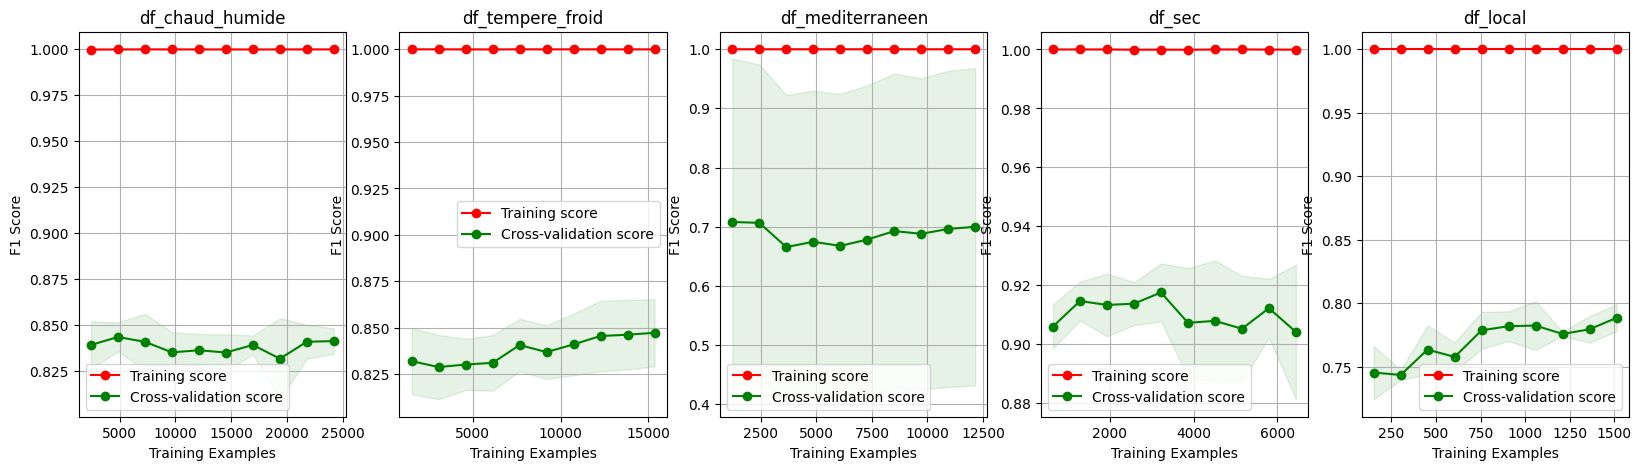

In [52]:
fig, axs = plt.subplots(ncols=len(df_names), figsize=(20,5))

for i, (name, df) in enumerate(zip(df_names, df_list)):
    X = df.drop("raintomorrow", axis=1)
    y = df["raintomorrow"]

    train_sizes, train_scores, test_scores = learning_curve(
        RandomForestClassifier(),
        X,
        y,
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1_weighted',
        n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axs[i].set_title(name)
    axs[i].set_xlabel("Training Examples")
    axs[i].set_ylabel("F1 Score")
    axs[i].grid()
    
    axs[i].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    axs[i].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    axs[i].plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    axs[i].plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    axs[i].legend(loc="best")

plt.show()

**Analyse :**
Les courbes d'apprentissage montrent que les performances du classificateur de forêt aléatoire s'améliorent à mesure que le nombre d'exemples d'entraînement augmente (sauf pour le modèle temps sec). Les courbes des scores d'entraînement et de validation croisée sont proches les unes des autres, ce qui indique qu'il n'y a pas de surapprentissage significatif. Cependant, la largeur de la zone ombrée autour des courbes varie entre les ensembles de données, avec df_mediterraneen ayant la zone la plus large, ce qui indique une plus grande variabilité dans les scores de performances


# 4. Conclusion <a name=4></a>
[return to the plan](#0)  

Ces modèles peuvent être utilisés (sauf pour le `modèle temps sec`). Car les courbes d'apprentissage générées montrent que les performances du modèle s'améliorent à mesure que le nombre d'exemples d'entraînement augmente, ce qui est une bonne indication de la capacité du modèle à généraliser à de nouvelles données. De plus, la faible différence entre les scores d'entraînement et de validation croisée suggère que les modèles ne souffrent pas de surapprentissage significatif.